In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/User/Desktop/AJAY/Unified Mentor/Project/Amazon sales/cleaned_amazon_sales_data.csv')

df.head()


,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,28-05-2010,669165933,27-06-2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,May
1,Central America and the Caribbean,Grenada,Cereal,Online,C,22-08-2012,963881480,15-09-2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,Aug
2,Europe,Russia,Office Supplies,Offline,L,02-05-2014,341417157,08-05-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,May
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,20-06-2014,514321792,05-07-2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,Jun
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,01-02-2013,115456712,06-02-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,Feb


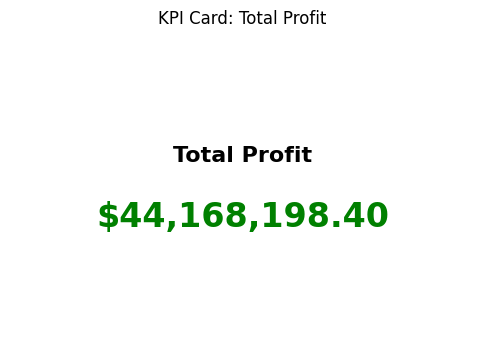

In [11]:

# Calculate total profit
total_profit = df['Total_Profit'].sum()

# Create a KPI Card using Matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
ax.text(0.5, 0.6, 'Total Profit', ha='center', va='center', fontsize=16, fontweight='bold')
ax.text(0.5, 0.4, f'${total_profit:,.2f}', ha='center', va='center', fontsize=24, fontweight='bold', color='green')

# Remove axes
ax.axis('off')

# Display the KPI Card
plt.title('KPI Card: Total Profit')
plt.show()


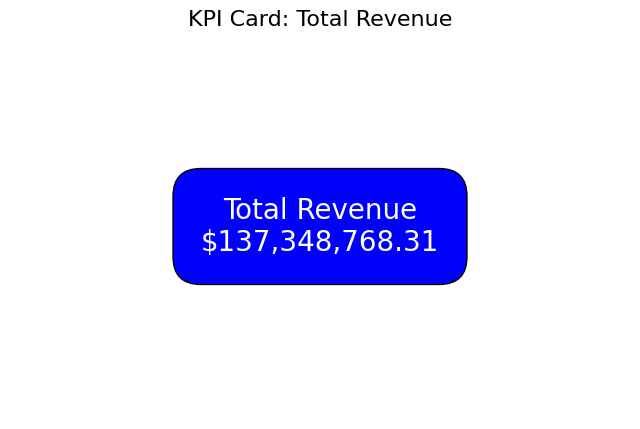

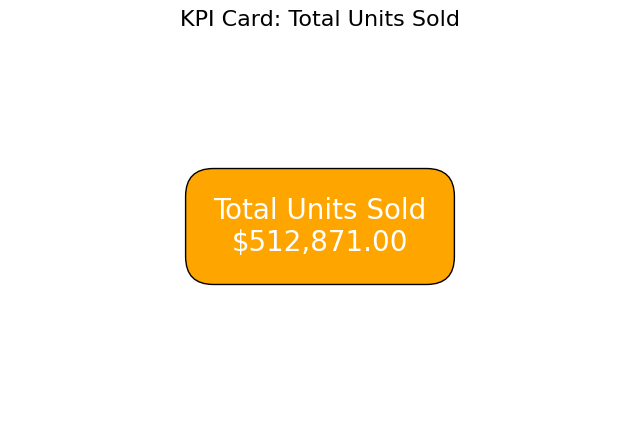

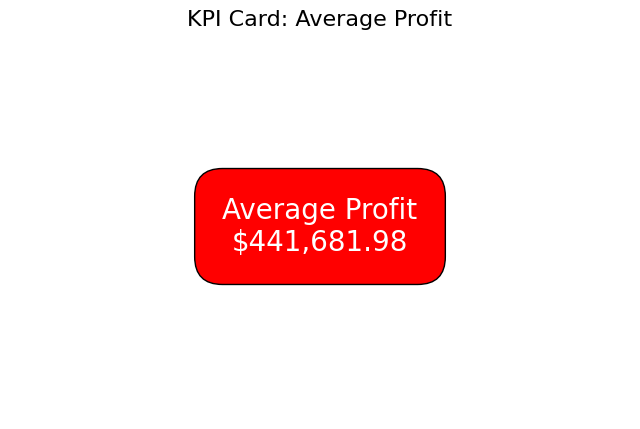

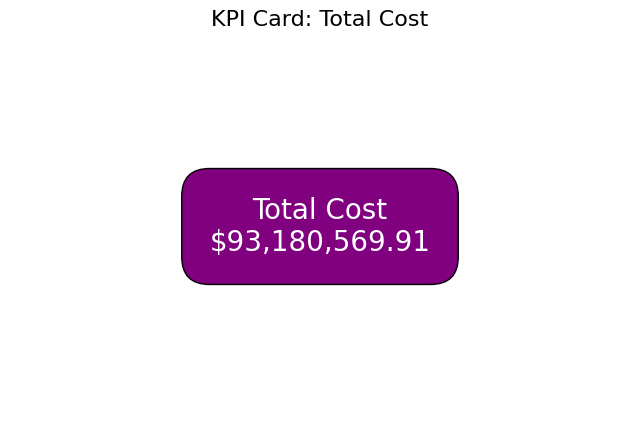

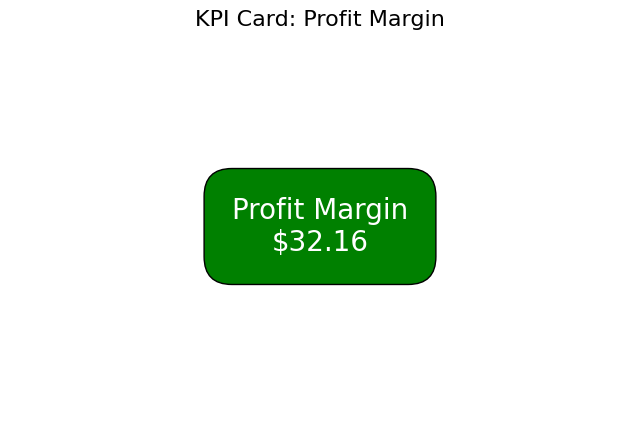

In [12]:

# Calculate Key Metrics
key_metrics = {
    'Total Revenue': df['Total_Revenue'].sum(),
    'Total Units Sold': df['Units_Sold'].sum(),
    'Average Profit': df['Total_Profit'].mean(),
    'Total Cost': df['Total_Cost'].sum(),
    'Profit Margin': (df['Total_Revenue'].sum() - df['Total_Cost'].sum()) / df['Total_Revenue'].sum()
}

# Function to create KPI card visualization
def create_kpi_card(title, value, color, filename=None):
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.text(0.5, 0.5, f'{title}\n${value:,.2f}', 
            fontsize=20, ha='center', va='center', color='white',
            bbox=dict(facecolor=color, edgecolor='black', boxstyle='round,pad=1'))

    # Remove axis
    ax.axis('off')

    plt.title(f'KPI Card: {title}', fontsize=16)
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    else:
        plt.show()

# Create and show KPI cards for each metric
create_kpi_card('Total Revenue', key_metrics['Total Revenue'], 'blue')
create_kpi_card('Total Units Sold', key_metrics['Total Units Sold'], 'orange')
create_kpi_card('Average Profit', key_metrics['Average Profit'], 'red')
create_kpi_card('Total Cost', key_metrics['Total Cost'], 'purple')
create_kpi_card('Profit Margin', key_metrics['Profit Margin']*100, 'green')  # Multiplied by 100 for percentage format


REVENUE BY REGION

In [13]:


revenue_by_region = df.groupby('Region').agg({'Total_Revenue': 'sum'}).reset_index()
print('Revenue by Region:\n', revenue_by_region)


Revenue by Region:
                               Region  Total_Revenue
0                               Asia    21347091.02
1              Australia and Oceania    14094265.13
2  Central America and the Caribbean     9170385.49
3                             Europe    33368932.11
4       Middle East and North Africa    14052706.58
5                      North America     5643356.55
6                 Sub-Saharan Africa    39672031.43


REVENUE BY COUNTRY

In [14]:
revenue_by_country = df.groupby('Country').agg({'Total_Revenue': 'sum'}).reset_index()
print('Revenue by Country:\n', revenue_by_country)


Revenue by Country:
            Country  Total_Revenue
0          Albania      247956.32
1           Angola     2798046.49
2        Australia     2489933.49
3          Austria     1244708.40
4       Azerbaijan     4478800.21
..             ...            ...
71      The Gambia     5449517.95
72    Turkmenistan     5822036.20
73          Tuvalu     2533654.00
74  United Kingdom      188452.14
75          Zambia      623289.30

[76 rows x 2 columns]


TOP SELLING ITEMS

In [15]:
top_item_types = df.groupby('Item_Type').agg({'Units_Sold': 'sum'}).reset_index()
print('Top Selling Item Types:\n', top_item_types)


Top Selling Item Types:
           Item_Type  Units_Sold
0         Baby Food       40545
1         Beverages       56708
2            Cereal       25877
3           Clothes       71260
4         Cosmetics       83718
5            Fruits       49998
6         Household       44727
7              Meat       10675
8   Office Supplies       46967
9     Personal Care       48708
10           Snacks       13637
11       Vegetables       20051


REVENUE BY CHANNEL

In [16]:
revenue_by_channel = df.groupby('Sales_Channel').agg({'Total_Revenue': 'sum'}).reset_index()
print('Revenue by Sales Channel:\n', revenue_by_channel)


Revenue by Sales Channel:
   Sales_Channel  Total_Revenue
0       Offline    79094809.20
1        Online    58253959.11


AVERAAGE ORDER VALUE

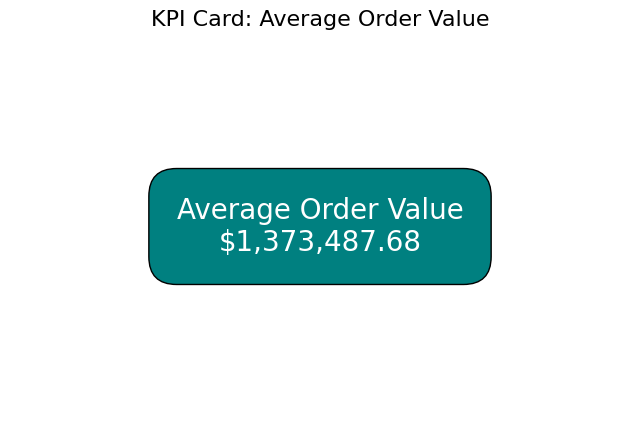

In [17]:
# Ensure Order_ID is a unique identifier by calculating Order_Value
df['Order_Value'] = df.groupby('Order_ID')['Total_Revenue'].transform('sum')

# Calculate the Average Order Value
avg_order_value = df['Order_Value'].mean()

# Function to create KPI card visualization
def create_kpi_card(title, value, color, filename=None):
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.text(0.5, 0.5, f'{title}\n${value:,.2f}', 
            fontsize=20, ha='center', va='center', color='white',
            bbox=dict(facecolor=color, edgecolor='black', boxstyle='round,pad=1'))

    # Remove axis
    ax.axis('off')

    plt.title(f'KPI Card: {title}', fontsize=16)
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    else:
        plt.show()

# Create and show KPI card for Average Order Value
create_kpi_card('Average Order Value', avg_order_value, 'teal')

AVERAGE SHIPPING TIME

C:\Users\User\AppData\Local\Temp\ipykernel_153044\128245139.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])
C:\Users\User\AppData\Local\Temp\ipykernel_153044\128245139.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])


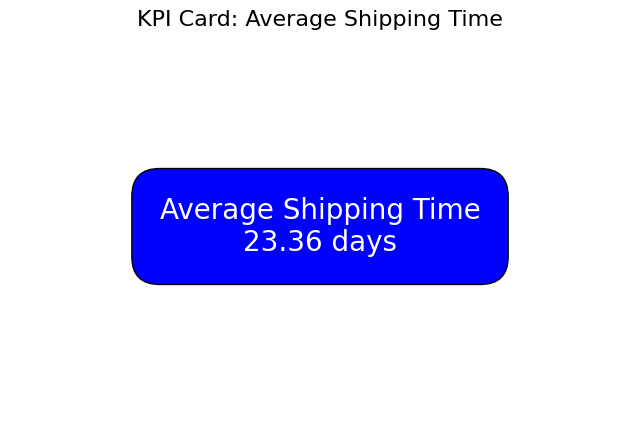

In [18]:
# Convert Order_Date and Ship_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

# Calculate Shipping Time in days
df['Shipping_Time'] = (df['Ship_Date'] - df['Order_Date']).dt.days

# Calculate Average Shipping Time
avg_shipping_time = df['Shipping_Time'].mean()

# Function to create KPI card visualization
def create_kpi_card(title, value, color, filename=None):
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.text(0.5, 0.5, f'{title}\n{value:.2f} days', 
            fontsize=20, ha='center', va='center', color='white',
            bbox=dict(facecolor=color, edgecolor='black', boxstyle='round,pad=1'))

    # Remove axis
    ax.axis('off')

    plt.title(f'KPI Card: {title}', fontsize=16)
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    else:
        plt.show()

# Create and show KPI card for Average Shipping Time
create_kpi_card('Average Shipping Time', avg_shipping_time, 'blue')

SALES BY CATEGORY

In [19]:
sales_by_category = df.groupby('Item_Type').agg({'Total_Revenue': 'sum'}).reset_index()
print('Sales by Product Category:\n', sales_by_category)


Sales by Product Category:
           Item_Type  Total_Revenue
0         Baby Food    10350327.60
1         Beverages     2690794.60
2            Cereal     5322898.90
3           Clothes     7787292.80
4         Cosmetics    36601509.60
5            Fruits      466481.34
6         Household    29889712.29
7              Meat     4503675.75
8   Office Supplies    30585380.07
9     Personal Care     3980904.84
10           Snacks     2080733.46
11       Vegetables     3089057.06


PROFIT MARGIN BY CATEGORY

In [20]:
profit_margin_by_category = df.groupby('Item_Type').agg({
    'Total_Profit': 'sum',
    'Total_Revenue': 'sum'
})
profit_margin_by_category['Profit_Margin'] = profit_margin_by_category['Total_Profit'] / profit_margin_by_category['Total_Revenue']
profit_margin_by_category.reset_index(inplace=True)
print('Profit Margin by Product Category:\n', profit_margin_by_category)


Profit Margin by Product Category:
           Item_Type  Total_Profit  Total_Revenue  Profit_Margin
0         Baby Food    3886643.70    10350327.60       0.375509
1         Beverages     888047.28     2690794.60       0.330032
2            Cereal    2292443.43     5322898.90       0.430676
3           Clothes    5233334.40     7787292.80       0.672035
4         Cosmetics   14556048.66    36601509.60       0.397690
5            Fruits     120495.18      466481.34       0.258307
6         Household    7412605.71    29889712.29       0.247999
7              Meat     610610.00     4503675.75       0.135580
8   Office Supplies    5929583.75    30585380.07       0.193870
9     Personal Care    1220622.48     3980904.84       0.306619
10           Snacks     751944.18     2080733.46       0.361384
11       Vegetables    1265819.63     3089057.06       0.409775


In [21]:
# Convert date columns to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format='%d-%m-%Y')


In [22]:
# Calculate Shipping_Time if not already present
if 'Shipping_Time' not in df.columns:
    df['Shipping_Time'] = (df['Ship_Date'] - df['Order_Date']).dt.days


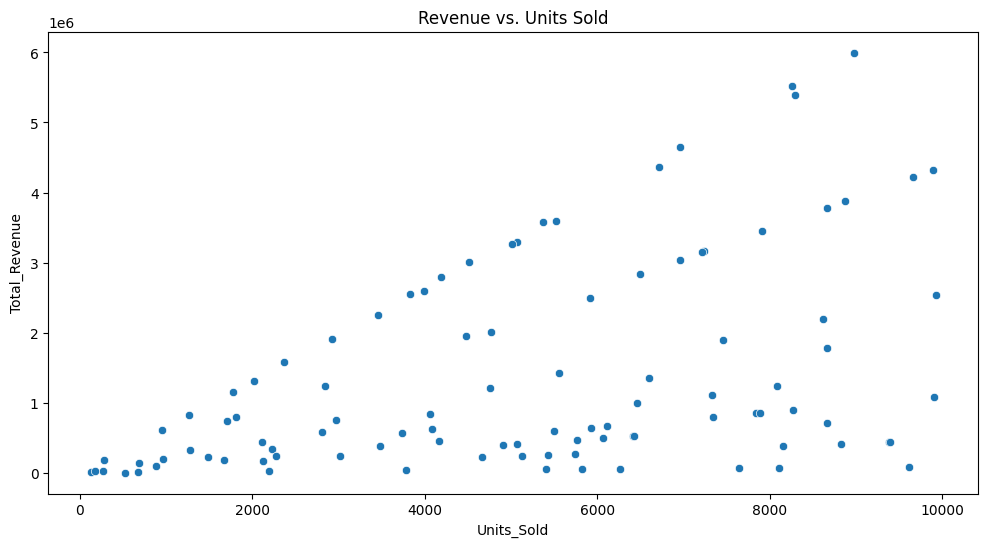

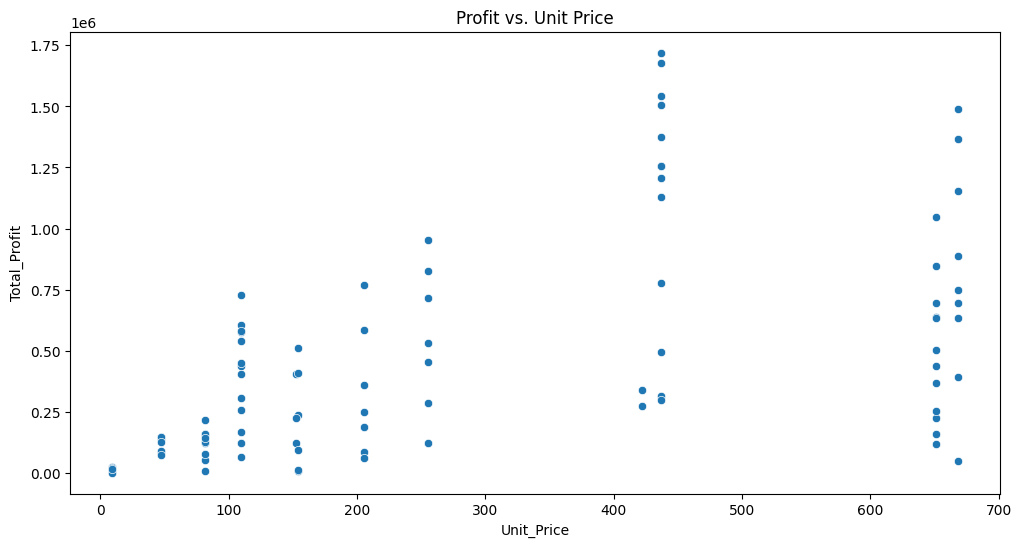

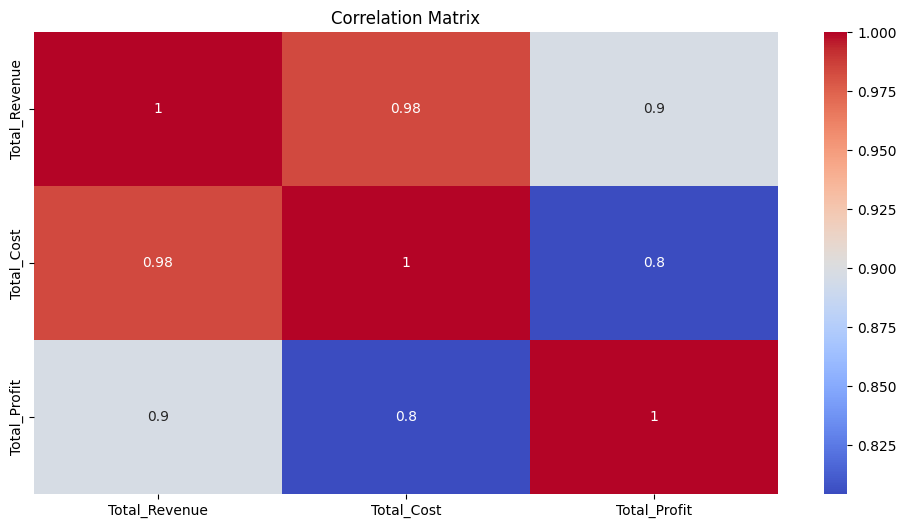

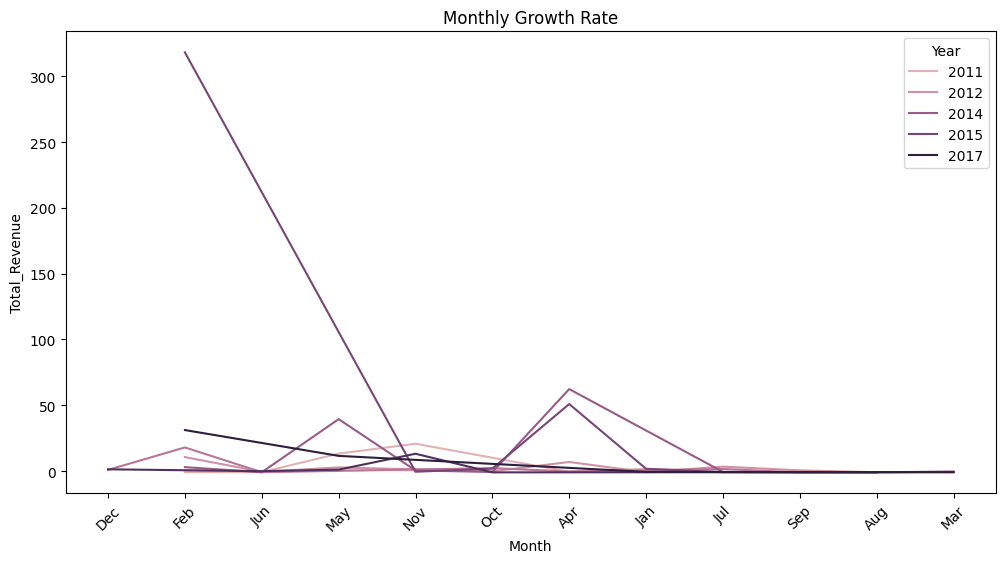

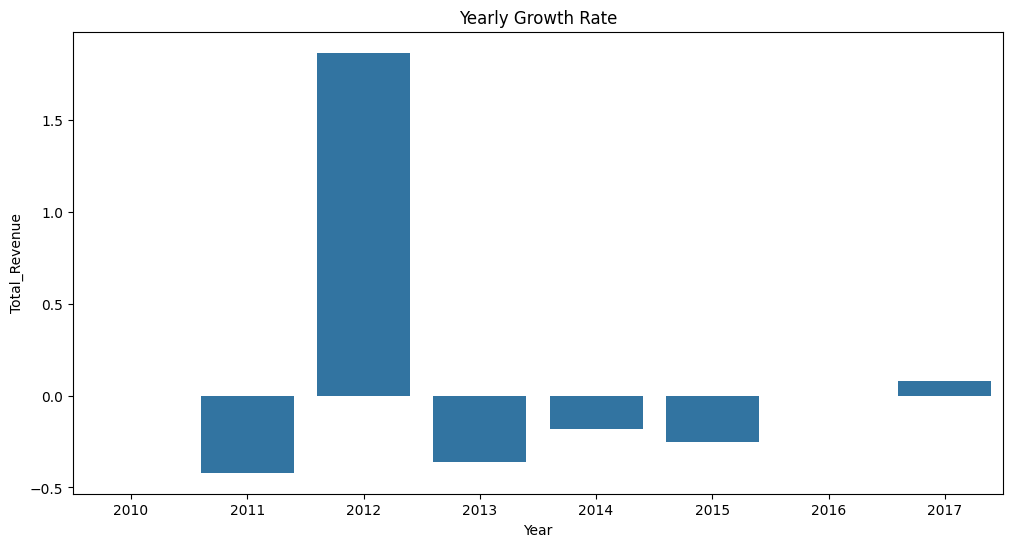

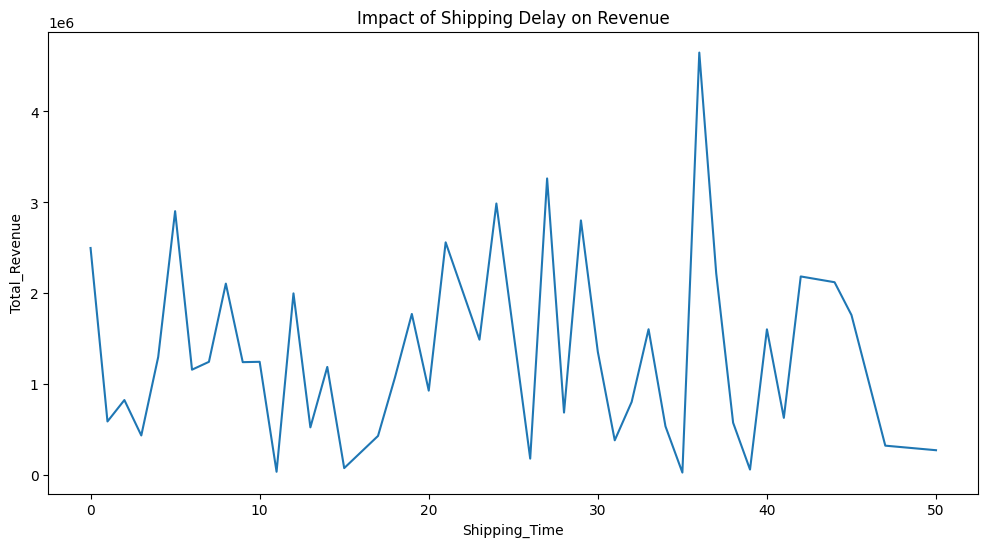

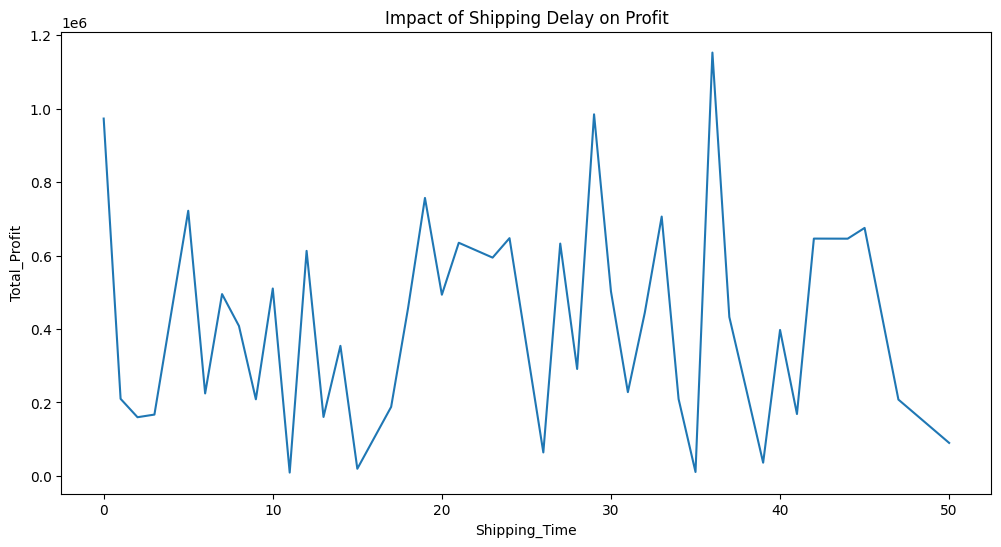

In [23]:
# Revenue vs. Units Sold
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Units_Sold', y='Total_Revenue', data=df)
plt.title('Revenue vs. Units Sold')
plt.show()

# Profit vs. Unit Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Unit_Price', y='Total_Profit', data=df)
plt.title('Profit vs. Unit Price')
plt.show()

# Correlation between Revenue and Cost
plt.figure(figsize=(12, 6))
sns.heatmap(df[['Total_Revenue', 'Total_Cost', 'Total_Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Monthly Growth Rate
monthly_growth = df.groupby(['Year', 'Month']).agg({'Total_Revenue': 'sum'}).pct_change().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_Revenue', hue='Year', data=monthly_growth)
plt.title('Monthly Growth Rate')
plt.xticks(rotation=45)
plt.show()

# Yearly Growth Rate
yearly_growth = df.groupby('Year').agg({'Total_Revenue': 'sum'}).pct_change().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Total_Revenue', data=yearly_growth)
plt.title('Yearly Growth Rate')
plt.show()

# Impact of Shipping Delay on Revenue
shipping_delay_revenue = df.groupby('Shipping_Time').agg({'Total_Revenue': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Shipping_Time', y='Total_Revenue', data=shipping_delay_revenue)
plt.title('Impact of Shipping Delay on Revenue')
plt.show()

# Impact of Shipping Delay on Profit
shipping_delay_profit = df.groupby('Shipping_Time').agg({'Total_Profit': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Shipping_Time', y='Total_Profit', data=shipping_delay_profit)
plt.title('Impact of Shipping Delay on Profit')
plt.show()


YEARLY REVENUE GROWTH RATE

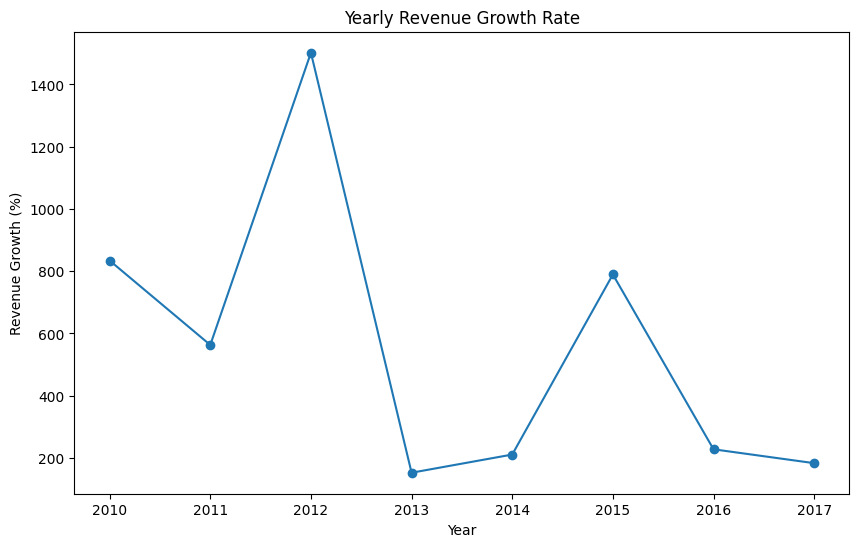

In [24]:
df['Revenue_Growth'] = df.groupby('Year')['Total_Revenue'].pct_change() * 100

plt.figure(figsize=(10, 6))
df.groupby('Year')['Revenue_Growth'].mean().plot(kind='line', marker='o')
plt.title('Yearly Revenue Growth Rate')
plt.xlabel('Year')
plt.ylabel('Revenue Growth (%)')
plt.show()


MONTH WISE SALES

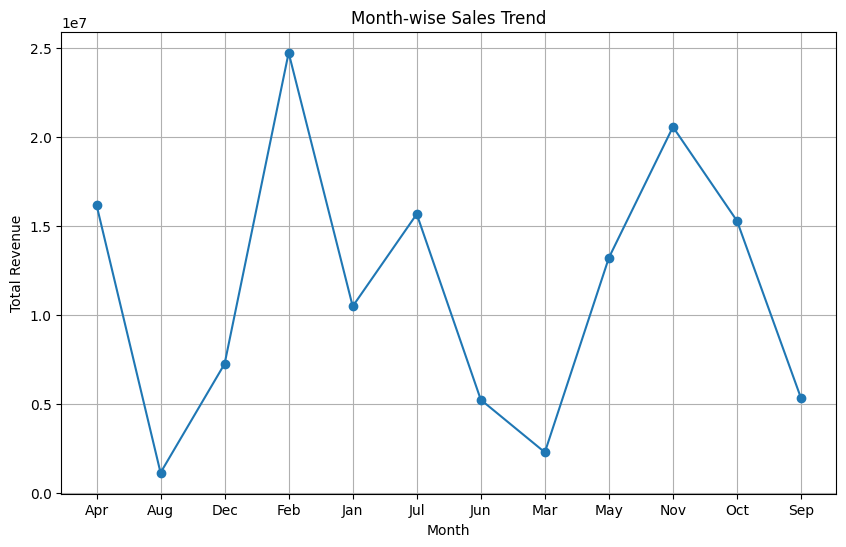

In [30]:
# Group by month and calculate total sales
month_wise_sales = sales_data.groupby('Month').agg({'Total_Revenue': 'sum'}).reset_index()

# Plot month-wise sales trend
plt.figure(figsize=(10, 6))
plt.plot(month_wise_sales['Month'], month_wise_sales['Total_Revenue'], marker='o')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

YEAR WISE SALES

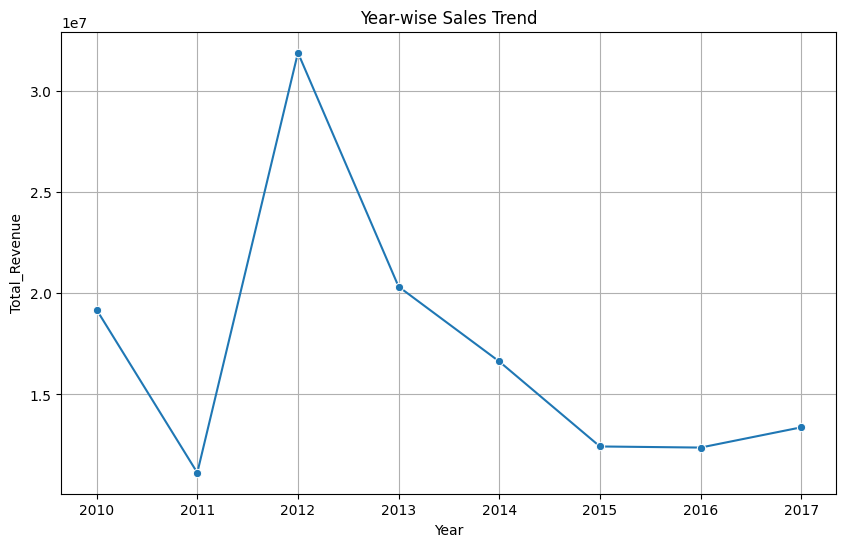

In [31]:
# Group by year and calculate total sales
year_wise_sales = sales_data.groupby('Year').agg({'Total_Revenue': 'sum'}).reset_index()

# Plot year-wise sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_wise_sales, x='Year', y='Total_Revenue', marker='o')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total_Revenue')
plt.grid(True)
plt.show()


YEARLY MONTH WISE SALES

Year-Month       object
Total_Revenue     int64
dtype: object


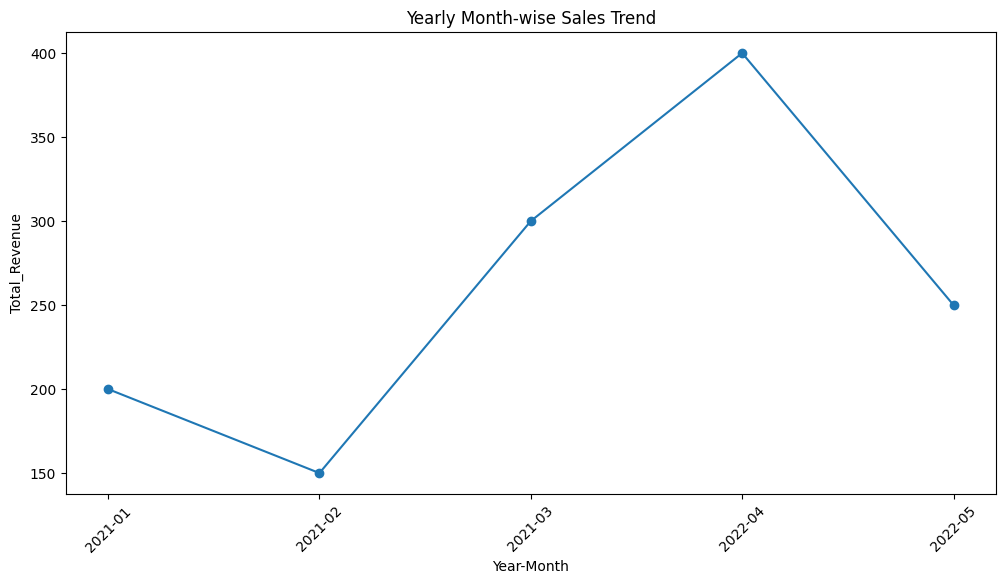

In [27]:
# Sample DataFrame
sales_data = pd.DataFrame({
    'Order_Date': ['2021-01-10', '2021-02-15', '2021-03-20', '2022-04-25', '2022-05-30'],
    'Total_Revenue': [200, 150, 300, 400, 250]
})

# Convert 'Order Date' to datetime
sales_data['Order_Date'] = pd.to_datetime(sales_data['Order_Date'])

# Extract 'Order Year' and 'Order Month' from 'Order Date'
sales_data['Year'] = sales_data['Order_Date'].dt.year
sales_data[' Month'] = sales_data['Order_Date'].dt.month

# Create 'Year-Month' column for combined year and month
sales_data['Year-Month'] = sales_data['Order_Date'].dt.to_period('M').astype(str)

# Aggregate yearly month-wise sales
year_month_wise_sales = sales_data.groupby('Year-Month').agg({'Total_Revenue': 'sum'}).reset_index()

# Check the types of columns
print(year_month_wise_sales.dtypes)

# Plot yearly month-wise sales trend using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(year_month_wise_sales['Year-Month'], year_month_wise_sales['Total_Revenue'], marker='o')
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total_Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

TOTAL REVENUE BY REGION

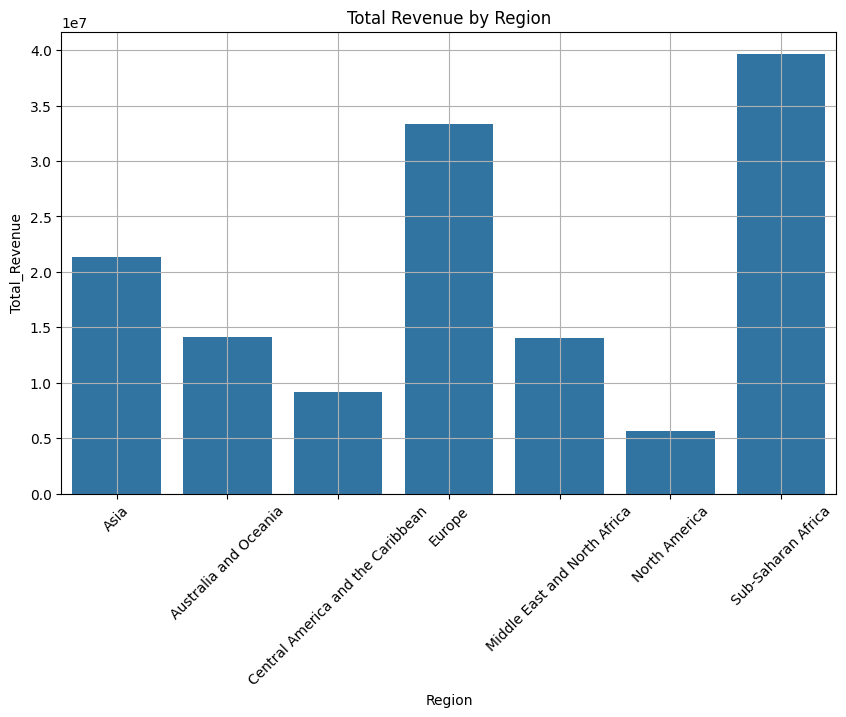

In [32]:
region_wise_sales = sales_data.groupby('Region').agg({'Total_Revenue': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=region_wise_sales, x='Region', y='Total_Revenue')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total_Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
